### Configuração do ambiente

Para esta atividade de introdução, iremos utilizar um **modelo R-CNN pré-treinado**.

Iremos clonar o repositório do Mask_RCNN para TensorFlow 2 do Github.

[Github](https://github.com/alsombra/Mask_RCNN-TF2)

Descomentar essa sessão na primeira vez que rodar o código para configurar o ambiente.

In [1]:
#!git clone https://github.com/alsombra/Mask_RCNN-TF2

Precisaremos de executar o arquivo **setup.py** dentro do repositório Mask_RCNN-TF2 para realizar a instalação da Mask R-CNN.

Precisaremos chegar até o diretório via código e executar este arquivo.

O caracter % (percentagem) indica que o comando a seguir é em linux. Necessário para não dar warnings (avisos) no código.

In [2]:
# Comando linux que indica o diretório atual que estamos
#%pwd

In [3]:
#%cd Mask_RCNN-TF2/

In [4]:
# Agora estamos no diretório Mask_RCNN_TF2
#%pwd

In [5]:
#!pip install -r requirements.txt

In [6]:
#!python setup.py install

Retornando para o diretório raiz do projeto

In [7]:
#%cd ..

Instalação do pycocotools para importação do coco.

In [8]:
#!pip install pycocotools

As duas instalações abaixo com versões específicadas (tensorflow e numpy) são necessárias para funcionar corretamente.

In [9]:
#!pip install tensorflow==2.15.0

In [10]:
#!pip install numpy==1.23

### Importação das bibliotecas

In [11]:
import os
import sys
import random
import math
import re # regular expressions
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.io
import skimage.draw
import json
import pandas as pd

c:\Users\DIOGO-PC\Desktop\Estudos\Computer_Vision_Learn\.venv\lib\site-packages\skimage\color\colorconv.py:55: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy import linalg


In [12]:
# Armazenar o diretório raiz da onde se encontra o repositório
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2') # Concatenando o diretório atual com o Mask RCNN
ROOT_DIR

'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\Segmentação_de_Imagens\\Segmentação_de_Instâncias\\Mask_RCNN-TF2'

In [13]:
path_exists = False

for i in sys.path:
    if i == ROOT_DIR:
        path_exists = True
        break

# Adicionando o caminho para o repositório do Mask R-CNN caso o path não exista
if not path_exists:
    sys.path.append(ROOT_DIR)

sys.path

['C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv',
 '',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\mask_rcnn-2.1-py3.10.egg',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\win32',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\Segmentação_de_Imagens\\Segmentação_de_In

Como adicionamos o caminho do repositório no path, conseguimos realizar a importação de alguns arquivos que estão dentro do repositório e que iremos utilizar.

In [14]:
from mrcnn.config import Config
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.model import log

Iremos adicionar outro path, no caso, dos exemplos (samples)

In [15]:
ROOT_DIR_COCO_SAMPLES = os.path.abspath('./Mask_RCNN-TF2/samples/coco/')

path_coco_samples_exists = False

for i in sys.path:
    if i == ROOT_DIR_COCO_SAMPLES:
        path_coco_samples_exists = True
        break


# Adicionando o caminho para os exemplos caso não exista
if not path_coco_samples_exists:
    sys.path.append(ROOT_DIR_COCO_SAMPLES)

sys.path

['C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\DIOGO-PC\\AppData\\Local\\Programs\\Python\\Python310',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv',
 '',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\mask_rcnn-2.1-py3.10.egg',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\win32',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\.venv\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\DIOGO-PC\\Desktop\\Estudos\\Computer_Vision_Learn\\Segmentação_de_Imagens\\Segmentação_de_In

In [16]:
# Caso o path for adicionado corretamente, não dará erros na importação
import coco

In [17]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs') # Este diretório só existirá após a rede neural estiver em funcionamento
IMAGE_DIR = os.path.join(ROOT_DIR, 'images') # Contém várias imagens de teste para utilizarmos

print(MODEL_DIR)
print(IMAGE_DIR)

c:\Users\DIOGO-PC\Desktop\Estudos\Computer_Vision_Learn\Segmentação_de_Imagens\Segmentação_de_Instâncias\Mask_RCNN-TF2\logs
c:\Users\DIOGO-PC\Desktop\Estudos\Computer_Vision_Learn\Segmentação_de_Imagens\Segmentação_de_Instâncias\Mask_RCNN-TF2\images


### Download do Dataset

O download do dataset pode ser realizado através desse link do Google Drive:

[Baixar dataset de balões](https://drive.google.com/file/d/1mkhPqgNggwinrMHDkzwPd5Ug7WDM7c4A/view?usp=drive_link)

Após o download, cole a pasta com os dados no diretório atual do arquivo e nomeie como "ballon".

**Explicação do dataset**

Para ensinar as redes neurais no contexto de detecção e segmentação de objetos, temos que ter 2 tipos de arquivos:
- A imagem em si.
- Um arquivo (no nosso caso, json) que armazena para cada um dos arquivos onde estão os balões na imagem.

Isso é chamado de **Aprendizagem Supervisionada**, no qual a rede neural terá as posições dos balões nas imagens de treinamento para que a rede neural consiga fazer previsões com outras imagens.


### Carregamento do Dataset

Iremos utilizar a classe Dataset do mrcnn do arquivo "utils.py" para facilitar a leitura e extração dos valores do json.

Iremos sobrescrever o método *load_object* que faz a leitura do arquivo json para extrair as anotações (posições x e y). 

Também iremos sobrescrever o método *load_mask* que gera as máscaras em bitmap para cada objeto na imagem por meio do desenho dos polígonos que são desenhados na imagem com base no conjunto de coordenadas descritos no json.

In [18]:
class DatasetPersonalizado(utils.Dataset):
    def load_object(self, dataset_dir, subset, nome_annotation="via_region_data.json"):
        """Carrega um subconjunto do dataset Balloon.
        dataset_dir: Diretorio raíz do dataset.
        subset: Subconjunto a ser carregado: train (treinamento) ou val (validação)
        """
        # Adiciona as classes. Nesse exemplo, temos apenas uma classe para adicionar.
        self.add_class("objetos", 1, "balloon")

        # Escolhe se é o dataset de Treinamento ou Validação
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Carrega as anotações (annotations)
        # VGG Image Annotator (Até a verão 1.6) salva cada imagem no formato:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # O que mais interessa para nós são as coordenadas x e y de cada região
        # Obs: No VIA 2.0, as regiões são salvas em forma de lista ao invés de dicionario.
        annotations = json.load(open(os.path.join(dataset_dir, nome_annotation)))
        annotations = list(annotations.values())  # não precisa das dict keys

        # A ferramenta VIA salva as imagens em JSON mesmo que elas não contenham nenhuma anotação. Então, pulamos as imagens não anotadas.
        annotations = [a for a in annotations if a['regions']]

        contagem = 0
        # Adiciona as imagens
        for a in annotations:
            # Pega as coordenadas x e y dos pontos dos poligonos que formam o contorno de cada instância do objeto.
            # Eles são armazenadas em shape_attributes (para visualizar, abra o arquivo json)
            # A condição if é necessária para que o código suporte anotações geradas pelas versões 1.x e 2.x da VIA.
            if type(a['regions']) is dict:
                polygons = [r['shape_attributes'] for r in a['regions'].values()]
            else:
                polygons = [r['shape_attributes'] for r in a['regions']]

            # A função load_mask() vai precisar do tamanho da imagem para que possa converter os polígonos em mascaras.
            # Infelizmente, o VIA não inclui isso no JSON, então devemos ler a imagem manualmente e gerar essas máscaras.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]
            contagem = contagem+1

            self.add_image("objetos",
                image_id=a['filename'],  # usa o nome do arquivo como id unico da imagem
                path=image_path,
                width=width, height=height,
                polygons=polygons)

        print("Imagens "+subset+": " + str(contagem))

    def load_mask(self, image_id):
        """Gera as mascaras das instâncias para a imagem.
       Returna:
        masks: Uma array booleana de formato/shape [height, width, instance count] com 1 mascara por instancia.
        class_ids: uma array de 1D contendo os IDs das mascaras das instancias.
        """
        # Se não for uma imagem de conjunto de dados do balão (balloon dataset), delegue à classe ascendente.
        image_info = self.image_info[image_id]
        #print(image_info)
        if image_info["source"] != "objetos":
            return super(self.__class__, self).load_mask(image_id)

        # Converte os poligonos em uma mascara bitmap com shape  [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)

        # Agora será calculado a máscara da instância. para cada pixel da imagem, classificará como pertencente à classe ou não
        for i, p in enumerate(info["polygons"]):
            # Pega os indices dos pixels dentro dos poligonos e define eles como = 1 (cor branca), caso contrário continuará valor 0 (cor preta)
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'], mask.shape) # passamos o .shape também como 3ª parâmetro para evitar possíveis erros

            ## Obs: para esse dataset a anotação foi feita usando formas poligonais.
            ## Entretanto, caso tenha usado outras formas pela ferramenta VIA (circulos e elipses) deverá especificar isso no código, ficando assim
            #if p['name'] == 'polygon':
            #  rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'], mask.shape)
            #elif p['name'] == 'circle':
            #  rr, cc = skimage.draw.circle(p['cx'], p['cy'], p['r'])
            #else:
            #  rr, cc = skimage.draw.ellipse(p['cx'], p['cy'], p['rx'], p['ry'], rotation=np.deg2rad(p['theta']))

            # Para as coordenadas específicas do polígino, atribuí o valor 1 para ficar com o fundo branco na imagem
            mask[rr, cc, i] = 1

        # Retorna a mascara e a array dos IDs das classes de cada instancia.
        # Como nesse exemplo temos uma classe apenas, retornamos uma array composta de 1s
        return mask.astype(bool), np.ones([mask.shape[-1]], dtype=np.int32)

    # Função que retorna o caminho da imagem
    def image_reference(self, image_id):
        """Retorna o caminho da imagem."""
        info = self.image_info[image_id]
        if info["source"] == "objetos":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

**Preparando o conjunto de dados**

In [19]:
PATH_DATASET = os.path.join('balloon')
ANNOTATION_NAME = 'via_region_data.json'

# Conjunto de treinamento
dataset_train = DatasetPersonalizado()
dataset_train.load_object(PATH_DATASET, 'train', ANNOTATION_NAME)
dataset_train.prepare() # Preparar a base de dados para utilização

# Conjunto de validação
dataset_val = DatasetPersonalizado()
dataset_val.load_object(PATH_DATASET, 'val', ANNOTATION_NAME)
dataset_train.prepare() # Preparar a base de dados para utilização

Imagens train: 61
Imagens val: 13


### Verificação/visualização do dataset (visualizando os retornos da classe DatasetPersonalizado)

In [20]:
# Função para exibir imagem
def exibir_imagem(image):
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Temos 61 imagens no total, iremos pegar a primeira imagem para visualizar a máscara.

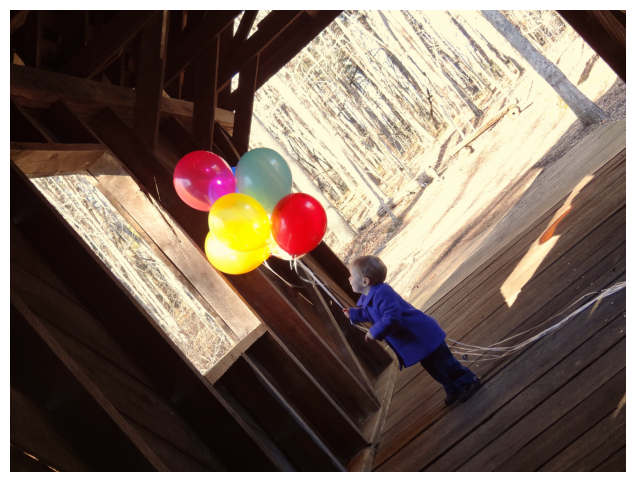

In [21]:
img_id = 7
img = dataset_train.load_image(img_id)
exibir_imagem(img)

[1 1 1 1 1 1]
(1536, 2048, 6)
Classes: ['BG', 'balloon']


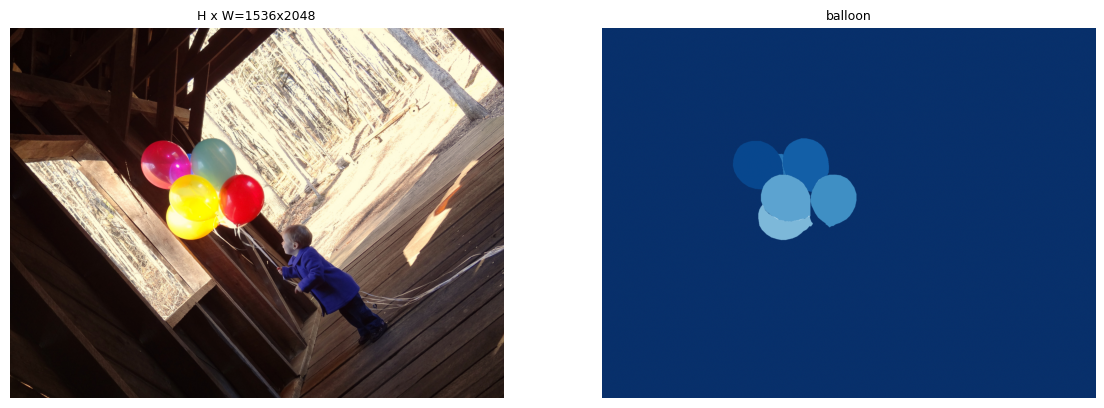

In [22]:
img_mask, class_ids = dataset_train.load_mask(img_id)

# Ids das classes de objetos detectados (no caso, só haverá id 1 pois só queremos detectar balões)
print(class_ids)

# Resolução de 1536x2048 pixels, onde há 6 máscaras (no caso, 6 máscaras para cada balão detectado)
# Ou seja, aqui temos 6 imagens diferentes que representam as máscaras de cada um dos balões
print(img_mask.shape)

print("Classes:", dataset_train.class_names)

visualize.display_top_masks(img, # Imagem original
                            img_mask, # Máscaras
                            class_ids, # Ids das classes
                            dataset_train.class_names, # Nome das classes
                            1) # Exibir apenas uma imagem com todas as máscaras

Temos os *bounding boxes* (caixas delimitadoras) relacionados ao balões que forma detectados (y1, x1, y2, x2).

In [23]:
# bbox => bounding boxes
bbox = utils.extract_bboxes(img_mask)
bbox

array([[ 468,  542,  671,  751],
       [ 457,  748,  681,  941],
       [ 522,  730,  610,  763],
       [ 608,  864,  828, 1056],
       [ 608,  659,  804,  865],
       [ 733,  648,  881,  874]])

In [24]:
print('Imagem', img_id, dataset_train.image_reference(img_id))
log('image', img) # Imagem original, pixels entre 0 e 255
log('image', img_mask) # Máscaras da imagem, pixels entre 0 e 1 (preto e branco)
log('class_ids', class_ids)
log('bbox', bbox)

Imagem 7 balloon\train\15717689633_5f7f78c28e_k.jpg
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000  uint8
image                    shape: (1536, 2048, 6)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (6,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (6, 4)                min:  457.00000  max: 1056.00000  int32


Podemos visualizar a segmentação de uma das imagens do conjunto de treino.

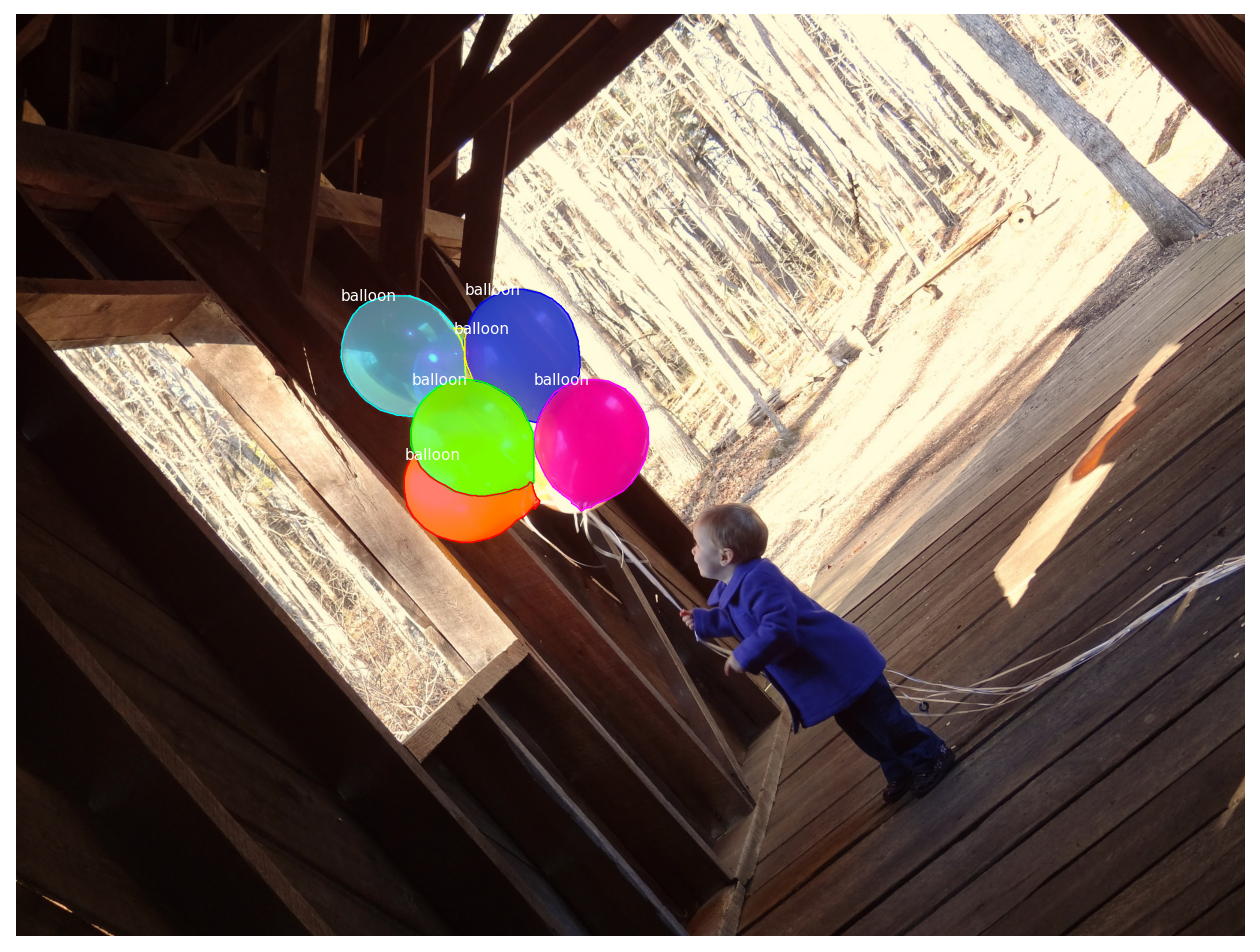

In [25]:
visualize.display_instances(img, 
                            bbox, 
                            img_mask, 
                            class_ids, 
                            dataset_train.class_names, 
                            show_bbox=False)

Para visualizar cada um dos segmentos detectados com a função display_images, precisamos realizar a transposição do array img_mask (linhas se tornarão colunas e colunas se tornarão linhas).

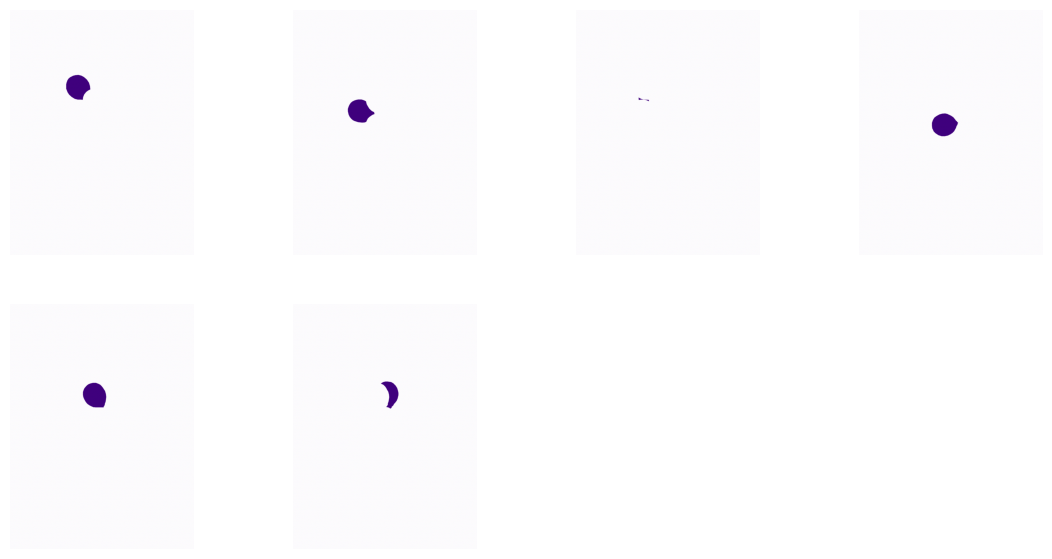

In [26]:
visualize.display_images(np.transpose(img_mask), cmap='Purples')

### Configurações da rede neural

In [ ]:
# TODO